# Clustering Ammar's Splicing Dataset
### Author: Shehbeel Arif

#### Preclinical Laboratory Research Unit

#### The Center for Data Driven Discovery in Biomedicine (D3b)
#### Children's Hospital of Philadelphia

In [1]:
# Library for data handling
import pandas as pd

# K-means classification
from sklearn.cluster import KMeans

# Library for UMAP projections
from umap.umap_ import UMAP
# Library for t-SNE projects
from sklearn.manifold import TSNE
# PCA clustering
from sklearn.decomposition import PCA

# Library for visualization
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('pan_cancer_splicing_SE_gene.txt', sep='\t')
df

Splice_ID  BS_15ETQ0E4  BS_1QNTEZPS  BS_31TF0P1N  BS_4E1G7E3G  \
0         CLIC2        0.000        0.000        0.000        0.000   
1         FAM3A        0.000        0.821        0.300        0.852   
2         MECP2        0.502        0.612        0.434        0.512   
3         PDZD4        0.000        0.000        0.000        0.000   
4         MTMR1        0.000        0.245        0.000        0.000   
...         ...          ...          ...          ...          ...   
14299      XKRX        0.000        0.000        0.000        0.000   
14300     GSTM5        0.000        0.000        0.000        0.000   
14301      TLR8        0.000        0.000        0.000        0.000   
14302    SEL1L2        0.000        0.000        0.000        0.000   
14303     NYAP1        0.000        0.000        0.000        0.000   

       BS_6G6C7VPX  BS_850BAHH9  BS_90B22NGP  BS_996ZS2A4  BS_9FHSNVS0  ...  \
0            0.000        0.000        0.000        0.000        0.000  ...   
1            0.759        0.776        0.794        0.704        0.320  ...   
2            0.601        0.615        0.498        0.622        0.445  ...   
3            0.000        0.000        0.882        0.000        0.894  ...   
4            0.169        0.000        0.000        0.000        0.000  ...   
...            ...          ...          ...          ...          ...  ...   
14299        0.000        0.000        0.000        0.000        0.000  ...   
14300        0.000        0.000        0.000        0.000        0.000  ...   
14301        0.000        0.000        0.000        0.000        0.000  ...   
14302        0.000        0.000        0.000        0.000        0.000  ...   
14303        0.000        0.000        0.000        0.000        0.000  ...   

       BS_WH5HDE0A  BS_Y8D1F5WW  BS_YEB88D32  BS_YETBN0RQ  BS_Z45HD492  \
0            0.000        0.000        0.000        0.000        0.000   
1            0.889        0.591        0.000        0.786        0.868   
2            0.558        0.509        0.629        0.430        0.558   
3            0.791        0.000        0.000        0.000        0.762   
4            0.146        0.541        0.000        0.253        0.764   
...            ...          ...          ...          ...          ...   
14299        0.000        0.000        0.000        0.000        0.000   
14300        0.000        0.000        0.000        0.000        0.000   
14301        0.000        0.000        0.000        0.000        0.000   
14302        0.000        0.000        0.000        0.000        0.000   
14303        0.000        0.000        0.000        0.000        0.000   

       BS_Z7PKVY9J  BS_ZV68CES9  BS_ZXYDSBM9  BS_BKR4E30C  BS_C7N3J4NW  
0            0.000        0.000        0.000        0.000        0.000  
1            0.000        0.816        0.753        0.814        0.846  
2            0.750        0.462        0.597        0.518        0.480  
3            0.796        0.894        0.133        0.135        0.630  
4            0.000        0.362        0.319        0.000        0.000  
...            ...          ...          ...          ...          ...  
14299        0.000        0.000        0.000        0.000        0.000  
14300        0.000        0.000        0.000        0.000        0.000  
14301        0.000        0.000        0.000        0.000        0.000  
14302        0.000        0.000        0.000        0.000        0.000  
14303        0.000        0.000        0.000        0.000        0.000  

[14304 rows x 604 columns]

## UMAP Plot

In [4]:
umap_2d = UMAP(n_components=2, init='random', random_state=0)
#umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(df.iloc[:,1:])
#proj_3d = umap_3d.fit_transform(new_df.loc[:, new_df.columns != 'class'])

fig_2d = px.scatter(proj_2d, x=0, y=1)

#fig_3d = px.scatter_3d(proj_3d, x=0, y=1, z=2, color=new_df['class'].tolist())

fig_2d.show()
#fig_3d.show()

## PCA Plot

In [5]:
# Initialize PCA object
pca = PCA(n_components=2) # Looking at only the first four principal components

# Perform PCA on PBTA dataset
pca_comps = pca.fit_transform(df.iloc[:,1:])

# Perform PCA on PBTA dataset
pca_comps = pca.fit_transform(df.iloc[:,1:])

# Display PCA plot based on K-means Classification
fig = px.scatter(pca_comps, x=0, y=1)

fig.show()

## t-SNE Plot

In [6]:
# Initialize t-SNE object
tsne_2d = TSNE(n_components=2, random_state=0, learning_rate='auto')
tsne_3d = TSNE(n_components=3, random_state=0, learning_rate='auto')

# Fit and transform the data
tsne_proj_2d = tsne_2d.fit_transform(df.iloc[:,1:])

fig_2d = px.scatter(tsne_proj_2d, x=0, y=1)

fig_2d.show()

/Users/arifs2/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



---

# Unsupervised Clustering using K-means

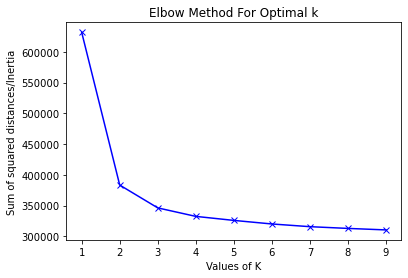

In [7]:
# Finding optimal k in K-means
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 _kmeans = KMeans(n_clusters=num_clusters)
 _kmeans.fit(df.iloc[:,1:])
 Sum_of_squared_distances.append(_kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In [10]:
# K-means classification k=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(df.iloc[:,1:])
kmeans.labels_

umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(df.iloc[:,1:])

fig_2d = px.scatter(proj_2d, x=0, y=1, color=kmeans.labels_)

fig_2d.show()

---

## Clustering by Splicing Sites

In [11]:
dft = df.T
dft.columns = dft.iloc[0]
dft = dft.drop(dft.index[0])
dft

Splice_ID   CLIC2  FAM3A  MECP2  PDZD4  MTMR1 SLITRK2 LINC00632  STAG2  THOC2  \
BS_15ETQ0E4   0.0    0.0  0.502    0.0    0.0     0.0       0.0  0.245  0.144   
BS_1QNTEZPS   0.0  0.821  0.612    0.0  0.245     0.0       0.0   0.54    0.0   
BS_31TF0P1N   0.0    0.3  0.434    0.0    0.0     0.0       0.0   0.43    0.0   
BS_4E1G7E3G   0.0  0.852  0.512    0.0    0.0     0.0       0.0  0.213    0.0   
BS_6G6C7VPX   0.0  0.759  0.601    0.0  0.169     0.0       0.0  0.738   0.16   
...           ...    ...    ...    ...    ...     ...       ...    ...    ...   
BS_Z7PKVY9J   0.0    0.0   0.75  0.796    0.0     0.0       0.0  0.543    0.0   
BS_ZV68CES9   0.0  0.816  0.462  0.894  0.362     0.0       0.0  0.756    0.0   
BS_ZXYDSBM9   0.0  0.753  0.597  0.133  0.319     0.0       0.0  0.644    0.0   
BS_BKR4E30C   0.0  0.814  0.518  0.135    0.0   0.598       0.0  0.852    0.0   
BS_C7N3J4NW   0.0  0.846   0.48   0.63    0.0   0.841       0.5  0.457    0.0   

Splice_ID    GRIA3  ... FAT2 PMEL PERM1 IRF8 TPSG1 XKRX GSTM5 TLR8 SEL1L2  \
BS_15ETQ0E4    0.0  ...  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0    0.0   
BS_1QNTEZPS    0.0  ...  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0    0.0   
BS_31TF0P1N    0.0  ...  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0    0.0   
BS_4E1G7E3G    0.0  ...  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0    0.0   
BS_6G6C7VPX    0.0  ...  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0    0.0   
...            ...  ...  ...  ...   ...  ...   ...  ...   ...  ...    ...   
BS_Z7PKVY9J    0.0  ...  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0    0.0   
BS_ZV68CES9    0.0  ...  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0    0.0   
BS_ZXYDSBM9    0.0  ...  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0    0.0   
BS_BKR4E30C  0.141  ...  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0    0.0   
BS_C7N3J4NW  0.752  ...  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0    0.0   

Splice_ID   NYAP1  
BS_15ETQ0E4   0.0  
BS_1QNTEZPS   0.0  
BS_31TF0P1N   0.0  
BS_4E1G7E3G   0.0  
BS_6G6C7VPX   0.0  
...           ...  
BS_Z7PKVY9J   0.0  
BS_ZV68CES9   0.0  
BS_ZXYDSBM9   0.0  
BS_BKR4E30C   0.0  
BS_C7N3J4NW   0.0  

[603 rows x 14304 columns]

In [12]:
umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(dft)

fig_2d = px.scatter(proj_2d, x=0, y=1)

fig_2d.show()

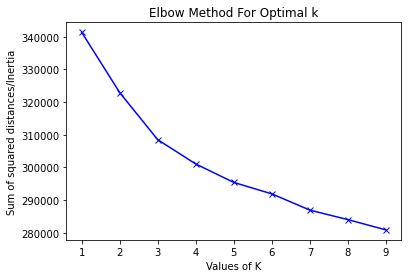

In [14]:
# Finding optimal k in K-means
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 _kmeans = KMeans(n_clusters=num_clusters)
 _kmeans.fit(dft)
 Sum_of_squared_distances.append(_kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In [15]:
# K-means classification k=3 and 4
kmeans = KMeans(n_clusters=3, random_state=0).fit(dft)
#kmeans.labels_

umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(dft)

fig_2d = px.scatter(proj_2d, x=0, y=1, color=kmeans.labels_)

fig_2d.show()